## K-Means 분할적 군집화
---
- 지정된 K만큼 임의의 중심점(Centroid)를 지정
- 중심점(Centroid)를 기준으로 가까운 거리에 있는 데이터를 하나의 군집으로 묶기
- 군집마다 다시 중심점(Centroid) 계산
- 중심점(Centroid) 이동이 더 이상 변경되지 않을때까지 반복하는 방법

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## [1] 데이터 로딩 및 준비

In [2]:
iris=load_iris()

In [3]:
irisData=iris.data

In [4]:
irisData.shape

(150, 4)

In [5]:
irisData=irisData[:, :2]
irisData.shape

(150, 2)

## [2] 데이터 처리

In [6]:
irisCluster=KMeans(n_clusters=2)

In [7]:
irisCluster.fit(irisData)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [8]:
# Cluster 객체 속성 확인
print(f' cluster_centers_ : {irisCluster.cluster_centers_}')
print(f' labels_ : {irisCluster.labels_}')
print(f' labels_ Counts : {np.unique(irisCluster.labels_, return_counts=True)}')
print(f' inertia_ : {irisCluster.inertia_}')
print(f' n_iter_ : {irisCluster.n_iter_}')

 cluster_centers_ : [[5.22409639 3.1313253 ]
 [6.61044776 2.96567164]]
 labels_ : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1
 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0]
 labels_ Counts : (array([0, 1]), array([83, 67], dtype=int64))
 inertia_ : 58.20409278906673
 n_iter_ : 4


In [9]:
# 샘플데이터 => 결정된 군집으로 변환
transliris=irisCluster.transform(irisData)

In [10]:
irisCluster.cluster_centers_[0]

array([5.22409639, 3.1313253 ])

## 시각화
---

In [11]:
irisDF=pd.DataFrame(irisData)
irisDF.shape

(150, 2)

In [12]:
# irisDF=np.concatenate((irisDF, irisCluster.labels_), axis=1)

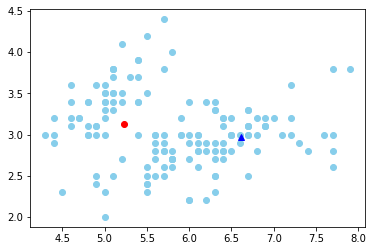

In [13]:
plt.scatter(irisData[:, 0], irisData[:, 1], c='skyblue')
plt.plot(irisCluster.cluster_centers_[0][0], irisCluster.cluster_centers_[0][1], 'ro',label='c1')
plt.plot(irisCluster.cluster_centers_[1][0], irisCluster.cluster_centers_[1][1], 'b^',label='c2')
plt.show()

In [24]:
irisDF.columns

RangeIndex(start=0, stop=2, step=1)

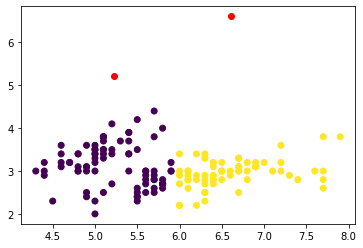

In [25]:
plt.scatter(irisData[:, 0], irisData[:, 1], c=irisCluster.labels_)
for idx in range(irisCluster.n_clusters):
    plt.plot(irisCluster.cluster_centers_[idx][0], irisCluster.cluster_centers_[idx][0], 'ro')
plt.show()    

In [26]:
integerList=[]
for k in range(1, 11):
    km=KMeans(n_clusters=k, random_state=11)
    km.fit(irisData)
    integerList.append(km.inertia_)
    
    sscore=silhouette_score(iri)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

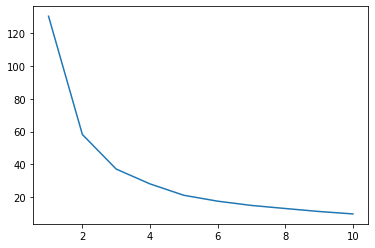

In [28]:
plt.plot(list(range(1, 11)), integerList)
plt.show()

In [29]:
from sklearn.metrics import silhouette_score

silhouette_score(irisData, irisCluster.labels_, metric='euclidean')

0.4629549773635977

## 군집화 이후 추가 작업
---
- 라벨과 데이터를 가지고 지도학습 분류로 성능 체크